<a href="https://colab.research.google.com/github/Amirhatamian/Programming-Project/blob/main/PROJECT16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# creating netflix_movie dataframe
nba_df = pd.read_csv('games_details.csv')
teams_df = pd.read_csv('teams.csv')

<ipython-input-31-86d468589409>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  nba_df = pd.read_csv('games_details.csv')


In [32]:
nba_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.7,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.0,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [33]:
nba_df.tail()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.5,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.0,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.0,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.0,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN
668627,11200005,1610612743,DEN,Denver,201951,Ty Lawson,NaN,NaN,NaN,27,3.0,6.0,0.500,0.0,0.0,0.0,2.0,4.0,0.500,0.0,2.0,2.0,6.0,2.0,0.0,6.0,1.0,8.0,NaN


In [34]:
nba_df.shape

(668628, 29)

In [35]:
nba_df.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,6.686280e+05,6.686280e+05,6.686280e+05,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.00000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,535277.000000
mean,2.171771e+07,1.610613e+09,4.013434e+05,3.588446,7.896652,0.416842,0.778117,2.186019,0.201032,1.733217,2.284212,0.435949,1.024212,3.033798,4.05801,2.103958,0.721436,0.460339,1.320297,1.999538,9.688218,-0.000488
std,5.656289e+06,8.652260e+00,7.225618e+06,3.030466,5.677002,0.251913,1.227615,2.569913,0.289685,2.353981,2.886583,0.428166,1.397830,2.687384,3.48250,2.475476,0.972231,0.860962,1.402329,1.502963,8.082152,10.665573
min,1.030000e+07,1.610613e+09,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.070003e+07,1.610613e+09,2.466000e+03,1.000000,3.000000,0.267000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,2.120096e+07,1.610613e+09,2.011810e+05,3.000000,7.000000,0.429000,0.000000,1.000000,0.000000,1.000000,2.000000,0.500000,1.000000,2.000000,3.00000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,2.180014e+07,1.610613e+09,2.034710e+05,5.000000,11.000000,0.571000,1.000000,4.000000,0.400000,3.000000,4.000000,0.909000,2.000000,4.000000,6.00000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,6.000000
max,5.210021e+07,1.610613e+09,1.962938e+09,28.000000,50.000000,1.000000,14.000000,24.000000,1.000000,26.000000,39.000000,1.000000,18.000000,25.000000,31.00000,25.000000,10.000000,12.000000,12.000000,15.000000,81.000000,57.000000


In [36]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

In [37]:
nba_df.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [38]:
nba_df.duplicated().sum()

0

In [39]:
nba_df.corr()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
GAME_ID,1.000000,-0.034193,-0.004770,0.032073,0.035696,-0.011566,0.040971,0.053392,0.014945,0.009810,0.006611,-0.012734,0.009419,0.028570,0.025827,0.014413,-0.004494,0.012488,-0.019849,0.016284,0.033135,0.000002
TEAM_ID,-0.034193,1.000000,0.005020,-0.004936,-0.002352,-0.000025,-0.020382,-0.024864,-0.007205,-0.000047,0.001390,0.003817,0.006152,-0.009826,-0.005113,-0.012319,-0.002167,0.003991,-0.007695,-0.002545,-0.006812,-0.016631
PLAYER_ID,-0.004770,0.005020,1.000000,-0.005698,-0.006998,-0.002473,0.003886,0.005461,0.002927,-0.007574,-0.007927,-0.006061,-0.005476,-0.005228,-0.006232,-0.005748,-0.003170,-0.003077,-0.007345,-0.007606,-0.005889,-0.006227
FGM,0.032073,-0.004936,-0.005698,1.000000,0.884811,0.495104,0.482553,0.445941,0.321772,0.471759,0.479046,0.381720,0.270930,0.446704,0.453461,0.403497,0.291612,0.175715,0.394347,0.269982,0.960616,0.196420
FGA,0.035696,-0.002352,-0.006998,0.884811,1.000000,0.207637,0.461507,0.578244,0.248690,0.509445,0.506872,0.410796,0.264840,0.446311,0.450714,0.473537,0.326079,0.146165,0.434416,0.275989,0.882013,0.094611
FG_PCT,-0.011566,-0.000025,-0.002473,0.495104,0.207637,1.000000,0.209441,0.035260,0.300301,0.136666,0.155110,0.159355,0.149736,0.210963,0.222899,0.090951,0.100545,0.131458,0.125096,0.174510,0.442903,0.190916
FG3M,0.040971,-0.020382,0.003886,0.482553,0.461507,0.209441,1.000000,0.821939,0.720576,0.154954,0.124534,0.155523,-0.111142,0.094987,0.028689,0.253522,0.158915,-0.052690,0.165492,0.077458,0.558897,0.158738
FG3A,0.053392,-0.024864,0.005461,0.445941,0.578244,0.035260,0.821939,1.000000,0.454892,0.203229,0.166303,0.195098,-0.131481,0.113583,0.034875,0.330298,0.204450,-0.069809,0.211504,0.087621,0.518457,0.077268
FG3_PCT,0.014945,-0.007205,0.002927,0.321772,0.248690,0.300301,0.720576,0.454892,1.000000,0.079904,0.054440,0.097949,-0.126282,0.027021,-0.029836,0.181416,0.108440,-0.071406,0.099213,0.036157,0.374019,0.138653
FTM,0.009810,-0.000047,-0.007574,0.471759,0.509445,0.136666,0.154954,0.203229,0.079904,1.000000,0.950707,0.682506,0.190581,0.323751,0.326330,0.311785,0.215998,0.129154,0.330792,0.199335,0.668572,0.111948


In [40]:
teams_df

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [41]:
teams_df.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [42]:
teams_df.shape

(30, 14)

In [43]:
teams_df.shape[0]

30

In [44]:
nba_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.7,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.0,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [45]:
# Assuming that the nba_df dataframe has columns 'GAME_ID', 'TEAM_ID', 'PLAYER_ID', 'NICKNAME', and 'COMMENT'
nba_df.drop(['GAME_ID', 'TEAM_ID', 'PLAYER_ID', 'NICKNAME', 'COMMENT'], axis=1, inplace=True)


In [46]:
nba_df

,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,SAS,San Antonio,Romeo Langford,F,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,SAS,San Antonio,Jeremy Sochan,F,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.700,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,SAS,San Antonio,Jakob Poeltl,C,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.000,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,SAS,San Antonio,Devin Vassell,G,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.000,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,SAS,San Antonio,Tre Jones,G,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.000,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,DEN,Denver,Jordan Hamilton,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,DEN,Denver,Kenneth Faried,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,DEN,Denver,Kosta Koufos,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,DEN,Denver,Timofey Mozgov,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [47]:
teams_df.drop(['LEAGUE_ID', 'TEAM_ID'], axis=1, inplace=True)


In [48]:
teams_df

,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [49]:
# Assuming the teams_df dataframe has a column called 'CITY' instead of 'TEAM_CITY'
nba_df = pd.merge(nba_df, teams_df, left_on='TEAM_CITY', right_on='CITY', how='outer')



In [50]:
nba_df = pd.concat([nba_df, teams_df])


In [51]:
nba_df
pd.set_option('display.max_columns', None)



In [52]:
nba_df

,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,SAS,San Antonio,Romeo Langford,F,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,1976.0,2019.0,SAS,Spurs,1976.0,San Antonio,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
1,SAS,San Antonio,Jeremy Sochan,F,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.7,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,1976.0,2019.0,SAS,Spurs,1976.0,San Antonio,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
2,SAS,San Antonio,Jakob Poeltl,C,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,1976.0,2019.0,SAS,Spurs,1976.0,San Antonio,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
3,SAS,San Antonio,Devin Vassell,G,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.0,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,1976.0,2019.0,SAS,Spurs,1976.0,San Antonio,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
4,SAS,San Antonio,Tre Jones,G,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,1976.0,2019.0,SAS,Spurs,1976.0,San Antonio,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.0,2019.0,WAS,Wizards,1961.0,Washington,Capital One Arena,20647.0,Ted Leonsis,Tommy Sheppard,Scott Brooks,Capital City Go-Go
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,2019.0,DET,Pistons,1948.0,Detroit,Little Caesars Arena,21000.0,Tom Gores,Ed Stefanski,Dwane Casey,Grand Rapids Drive
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0,2019.0,CHA,Hornets,1988.0,Charlotte,Spectrum Center,19026.0,Michael Jordan,Mitch Kupchak,James Borrego,Greensboro Swarm
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970.0,2019.0,CLE,Cavaliers,1970.0,Cleveland,Quicken Loans Arena,20562.0,Dan Gilbert,Koby Altman,John Beilein,Canton Charge


In [53]:
nba_df.drop(['ABBREVIATION', 'CITY',], axis=1, inplace=True)


In [54]:
nba_df



,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,MIN_YEAR,MAX_YEAR,NICKNAME,YEARFOUNDED,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,SAS,San Antonio,Romeo Langford,F,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,1976.0,2019.0,Spurs,1976.0,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
1,SAS,San Antonio,Jeremy Sochan,F,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.7,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,1976.0,2019.0,Spurs,1976.0,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
2,SAS,San Antonio,Jakob Poeltl,C,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,1976.0,2019.0,Spurs,1976.0,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
3,SAS,San Antonio,Devin Vassell,G,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.0,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,1976.0,2019.0,Spurs,1976.0,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
4,SAS,San Antonio,Tre Jones,G,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,1976.0,2019.0,Spurs,1976.0,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.0,2019.0,Wizards,1961.0,Capital One Arena,20647.0,Ted Leonsis,Tommy Sheppard,Scott Brooks,Capital City Go-Go
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,2019.0,Pistons,1948.0,Little Caesars Arena,21000.0,Tom Gores,Ed Stefanski,Dwane Casey,Grand Rapids Drive
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988.0,2019.0,Hornets,1988.0,Spectrum Center,19026.0,Michael Jordan,Mitch Kupchak,James Borrego,Greensboro Swarm
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970.0,2019.0,Cavaliers,1970.0,Quicken Loans Arena,20562.0,Dan Gilbert,Koby Altman,John Beilein,Canton Charge


In [59]:
nba_df.isnull().sum()


TEAM_ABBREVIATION         30
TEAM_CITY                 30
PLAYER_NAME               30
START_POSITION        435588
MIN                   115910
FGM                   115910
FGA                   115910
FG_PCT                115910
FG3M                  115910
FG3A                  115910
FG3_PCT               115910
FTM                   115910
FTA                   115910
FT_PCT                115910
OREB                  115910
DREB                  115910
REB                   115910
AST                   115910
STL                   115910
BLK                   115910
TO                    115910
PF                    115910
PTS                   115910
PLUS_MINUS            141190
MIN_YEAR               25837
MAX_YEAR               25837
NICKNAME               25837
YEARFOUNDED            25837
ARENA                  25837
ARENACAPACITY         101871
OWNER                  25837
GENERALMANAGER         25837
HEADCOACH              25837
DLEAGUEAFFILIATION     25837
dtype: int64

In [56]:
# Check for null values.
for col in nba_df.columns:
  null_rate = nba_df[col].isnull().sum() / len(nba_df) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in TEAM_ABBREVIATION : 0.004253189537720829%
Percentage of null values in TEAM_CITY : 0.004253189537720829%
Percentage of null values in PLAYER_NAME : 0.004253189537720829%
Percentage of null values in START_POSITION : 61.754610811891354%
Percentage of null values in MIN : 16.432906643907376%
Percentage of null values in FGM : 16.432906643907376%
Percentage of null values in FGA : 16.432906643907376%
Percentage of null values in FG_PCT : 16.432906643907376%
Percentage of null values in FG3M : 16.432906643907376%
Percentage of null values in FG3A : 16.432906643907376%
Percentage of null values in FG3_PCT : 16.432906643907376%
Percentage of null values in FTM : 16.432906643907376%
Percentage of null values in FTA : 16.432906643907376%
Percentage of null values in FT_PCT : 16.432906643907376%
Percentage of null values in OREB : 16.432906643907376%
Percentage of null values in DREB : 16.432906643907376%
Percentage of null values in REB : 16.432906643907376%
Percen

In [57]:
nba_df.isnull()

,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,MIN_YEAR,MAX_YEAR,NICKNAME,YEARFOUNDED,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
26,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
27,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
28,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

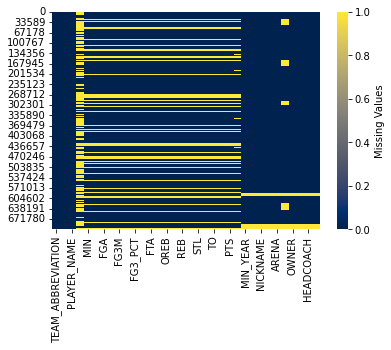

In [58]:
sns.heatmap(nba_df.isnull(),cmap='cividis', cbar_kws={'label': 'Missing Values'})